In [1]:
from myai.imports import *
from visualbench.tasks.function_descent import FunctionDescent
from visualbench.tasks.box_packing import BoxPacking
from visualbench.tasks.inverse import MatrixInverse
import torchzero as tz

In [2]:
from myai.aicode.deepseek.lstsq_gradient_interpolation import GradientLossExtrapolationSGD

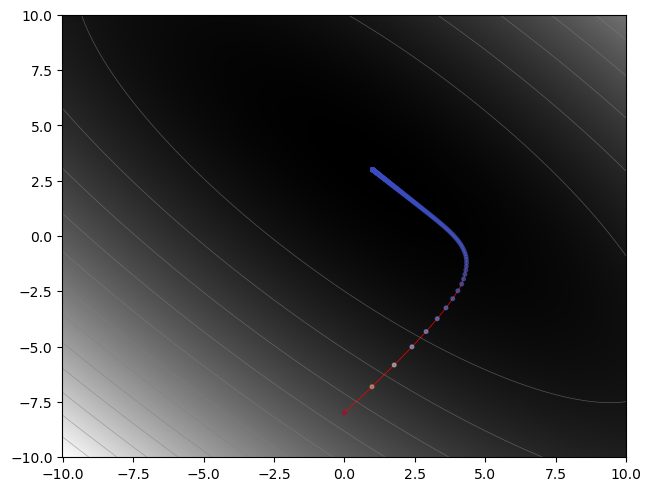

In [82]:
bench = FunctionDescent('booth')
opt = GradientLossExtrapolationSGD(bench.parameters(), adjust_factor=1)
bench.run(opt, 1000,)
bench.plot_solution()

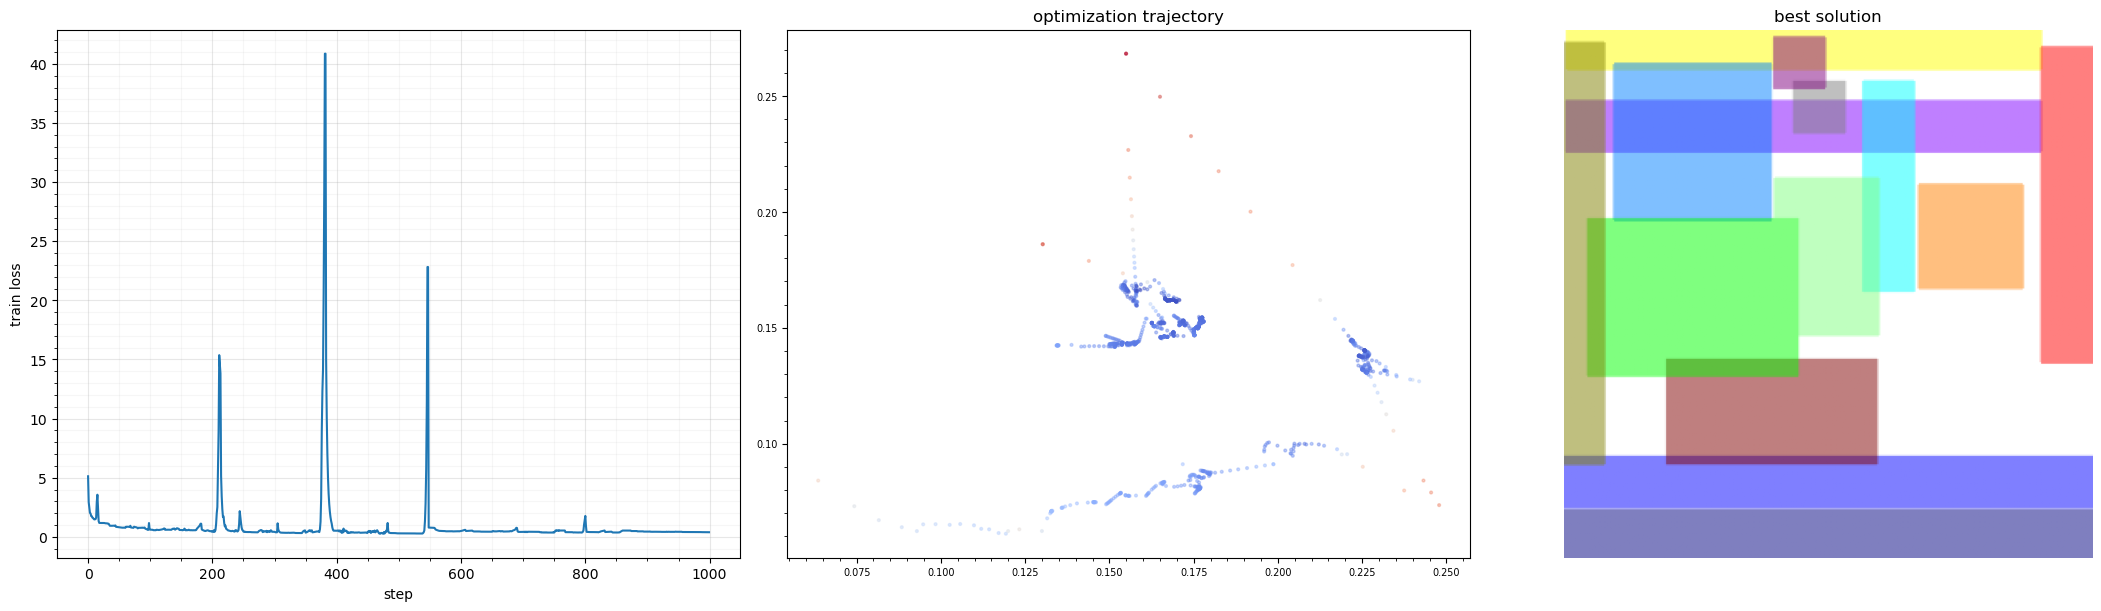

In [6]:
bench = BoxPacking()
opt = GradientLossExtrapolationSGD(bench.parameters(), 3e-2, max_norm_diff=3)
bench.run(opt, 1000,)
bench.plot_summary(1, fig=Fig().figsize(24, 6))

In [7]:
bench.render_video('GLESGD0.03 x3')

1000/1000 | 12.65s               


In [ ]:
REDUCTION = 0
BW = False

image = znormalize(imreadtensor('/var/mnt/ssd/Файлы/Изображения/Сохраненное/sanic.jpg').float())
if REDUCTION > 1:
    image = image[:,::REDUCTION,::REDUCTION].clone()
if BW: image = image.mean(0)

print(f'{image.shape = }, {image.numel() = }')
bench = MatrixInverse(image)
opt = RaySubspace(bench.parameters(), 100, max_ls_iter=1)
bench.run(opt, 1000)
bench.plot_summary()